In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Kmeans.csv")

In [3]:
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


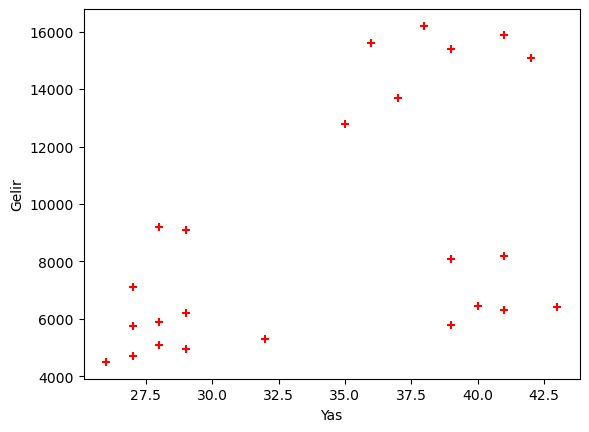

In [8]:
# verilere grafik cizip bir bakalim
plt.scatter(df.Yas,df.Gelir, marker="+",color="red")
plt.ylabel('Gelir')
plt.xlabel('Yas')
plt.show()

In [13]:
# verileri sklearn.preprocessing import MinMaxScaler ile normalize edelim bunu kutuphanesiz de yapabilinir

scaler = MinMaxScaler()

scaler = scaler.fit(df[['Gelir']])
df['Gelir'] = scaler.transform(df[['Gelir']])

scaler = scaler.fit(df[['Yas']])
df['Yas'] = scaler.transform(df[['Yas']])

# bu islemi su sekildede yapilabilinir
# scaler = scaler.fit(df)
# df = scaler.transform(df)
# peki neden yapmadik cunku yaparsak normalize etmeyi her seye yapar Ad kolonu dahil ad oldugu icin hata verir

In [14]:
# normalize edilmis haline bakalim
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


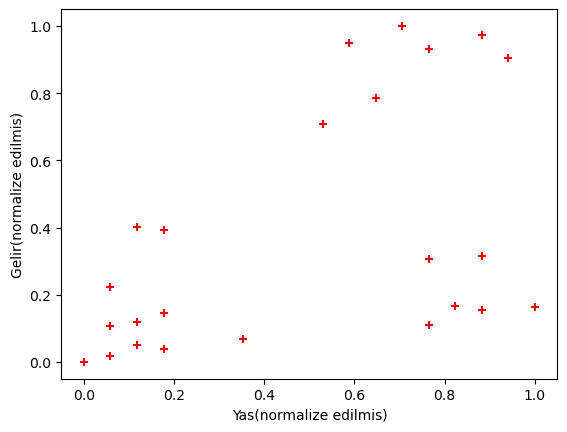

In [15]:
# grafigide bakalim
plt.scatter(df.Yas,df.Gelir, marker="+",color="red")
plt.ylabel('Gelir(normalize edilmis)')
plt.xlabel('Yas(normalize edilmis)')
plt.show()

In [17]:
# k = 3 degeri icin modeli olusturalim not: k-means da k degeri modelin kac tane merkez sececegine bakar 
kMeansModel = KMeans(n_clusters=3)
y_predicted = kMeansModel.fit_predict(df[['Yas','Gelir']])
y_predicted

C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1])

### yukaridaki array gruplanmis elimizde datanin 0 1 ve 2 diye ayirilmis ve sirasiyla kimin hangi grupta oldugunu gostericek sekilde gruplanmis

In [18]:
# bu bilgileri df mize ekleyelim

df['Clustering'] = y_predicted
df.head()

,Ad,Yas,Gelir,Clustering
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,2
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,2
4,Batuhan,0.882353,0.974359,2


In [19]:
# merkezlere bakalim
kMeansModel.cluster_centers_

array([[0.85294118, 0.20299145],
       [0.12834225, 0.14219114],
       [0.72268908, 0.89377289]])

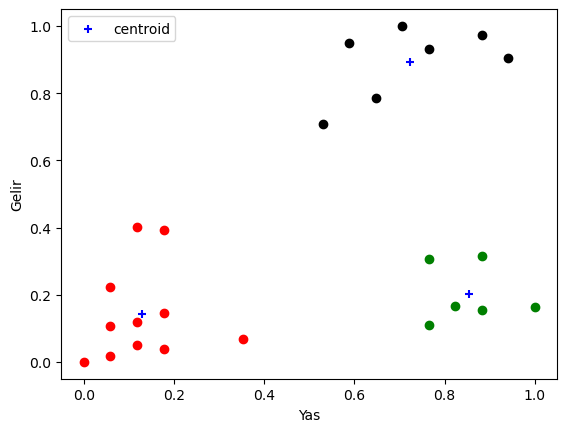

In [27]:
df1 = df[df.Clustering==0]
df2 = df[df.Clustering==1]
df3 = df[df.Clustering==2]
plt.xlabel('Yas')
plt.ylabel('Gelir')
plt.scatter(df1.Yas,df1['Gelir'],color='green')
plt.scatter(df2.Yas,df2['Gelir'],color='red')
plt.scatter(df3.Yas,df3['Gelir'],color='black')

plt.scatter(kMeansModel.cluster_centers_[:,0],kMeansModel.cluster_centers_[:,1], color='blue', marker="+",label='centroid')
plt.legend()
plt.show()


In [29]:
df.sort_values('Clustering')[['Ad','Clustering']]

,Ad,Clustering
21,Seyma,0
19,Koray,0
18,Nihal,0
17,Gurkan,0
16,Veli,0
22,Tuncer,0
0,Ismail,1
20,Melih,1
15,Rauf,1
14,Seyma,1


### K degerini belirlemek yukarida biz k icin 3 girdik ama bu deger kafamiza gore rastgele verilmemeli simdi kendimiz nasil bulabiliriz ona bakalim

## Elbow yontemi

In [32]:
# 
k_range = range(1,20)

list_dist = []

for k in k_range:
    kMeansModel = KMeans(n_clusters=k)
    kMeansModel.fit_predict(df[['Yas','Gelir']])
    list_dist.append(kMeansModel.inertia_)

C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

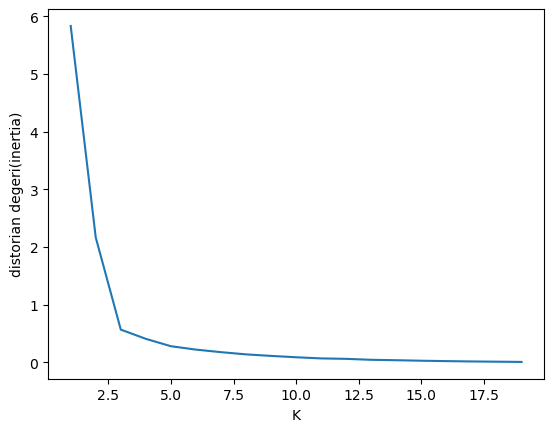

In [33]:
# k degerlerinin grafigini cizelim
plt.xlabel('K')
plt.ylabel('distorian degeri(inertia)')
plt.plot(k_range,list_dist)
plt.show()

## grafikte ki kirilma noktasi 3 yani k degerimiz 3